<h2>Project Final:</h2>
<h2>The Movie Recommender System</h2>
 
 Team 11:
* Lý Quốc Dũng : 19133015
* Đoàn Trần Đăng Khoa: 19133028
* Lê Thị Kim Ngân : 19133038
* Bùi Thị Ngân Tuyền : 19133066

<h3>Task assignment</h3>

Lý Quốc Dũng :         19133015        
 * EDA + Content-Based
 
Đoàn Trần Đăng Khoa:   19133028    
 * EDA + Clean Data + Demographic Filtering
 
Lê Thị Kim Ngân :      19133038 
 * EDA + Collaborative Filtering

Bùi Thị Ngân Tuyền :   19133066  
 * EDA +  Apriori Algorithiom 


<h3> Introduction </h3>

Hệ thống đề xuất dự đoán khả năng người dùng sẽ ủng hộ một mặt hàng. Dựa trên tìm kiếm của người dùng và tương tác trước đây của người dùng với nguồn dữ liệu mà hệ thống học hỏi (ngoài dữ liệu từ những người dùng khác hoặc xu hướng lịch sử), hệ thống có khả năng đề xuất một mặt hàng cho người dùng. Ví dụ Netflix giới thiệu những bộ phim mà họ nghĩ rằng chúng tôi sẽ thích

<h3> Mô tả data </h3>


* Data được lấy từ nguồn Kaggle : https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_credits.csv
* Data gồm có 4 csv : ratings.csv, movies.csv, tmdb_5000_credits.csv, tmdb_5000_movies.csv
    * ratings.csv: 100837 dòng ,4 cột :userId,movieId,rating,timestamp
    * movies.csv: 9743 dòng, 3 cột :movieId,title,genres
    * tmdb_5000_credits.csv : 4814 dòng, 4 cột: movie_id,title,cast,crew
    * tmdb_5000_movies.csv: 4804 dòng, 20 cột: budget,genres,homepage,id,keywords,original_language,original_title,overview, popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count




<h3> Motivation </h3>


* Để làm sạch dữ liệu cho hiệu suất tốt hơn của mô hình và EDA.

* Để thực hiện EDA để có được cái nhìn sâu sắc

* Để xây dựng hệ thống đề xuất phim đề xuất phim dựa trên sự tương đồng và hành vi xem

* Để khám phá kiến thức và kỹ năng

<h3> Clean Data </h3>

In [133]:
import pandas as pd
import numpy as np
import ast

In [134]:
movie= pd.read_csv("tmdb_5000_movies.csv")
movie.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [135]:
credits= pd.read_csv("tmdb_5000_credits.csv")
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [136]:
df=pd.merge(movie, credits, on="title", how="inner")
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [138]:
df=df[["budget", "popularity","id", "production_companies", "release_date", "revenue", "title","vote_average","vote_count", "movie_id", "overview", "genres", "keywords", "cast", "crew"]]
df.head()

,budget,popularity,id,production_companies,release_date,revenue,title,vote_average,vote_count,movie_id,overview,genres,keywords,cast,crew
0,237000000,150.437577,19995,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,Avatar,7.2,11800,19995,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,139.082615,285,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,285,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,107.376788,206647,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,Spectre,6.3,4466,206647,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,112.312950,49026,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,49026,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,43.926995,49529,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,John Carter,6.1,2124,49529,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [139]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L 

In [140]:
df.dropna(inplace=True)


In [141]:
df['genres'] = df['genres'].apply(convert)
df['keywords'] = df['keywords'].apply(convert)
df.head()

,budget,popularity,id,production_companies,release_date,revenue,title,vote_average,vote_count,movie_id,overview,genres,keywords,cast,crew
0,237000000,150.437577,19995,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,Avatar,7.2,11800,19995,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,139.082615,285,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,285,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,107.376788,206647,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,Spectre,6.3,4466,206647,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,112.312950,49026,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,49026,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,43.926995,49529,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,John Carter,6.1,2124,49529,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [142]:
df["production_companies"][0]


'[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]'

In [143]:
def convert3(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 2:
            L.append(i['name'])
        counter+=1
    return L 

In [144]:
df["production_companies"]=df["production_companies"].apply(convert3)
df['cast'] = df['cast'].apply(convert3)
df.head()

,budget,popularity,id,production_companies,release_date,revenue,title,vote_average,vote_count,movie_id,overview,genres,keywords,cast,crew
0,237000000,150.437577,19995,"[Ingenious Film Partners, Twentieth Century Fo...",2009-12-10,2787965087,Avatar,7.2,11800,19995,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,139.082615,285,"[Walt Disney Pictures, Jerry Bruckheimer Films]",2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,285,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,107.376788,206647,"[Columbia Pictures, Danjaq]",2015-10-26,880674609,Spectre,6.3,4466,206647,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,112.312950,49026,"[Legendary Pictures, Warner Bros.]",2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,49026,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,43.926995,49529,[Walt Disney Pictures],2012-03-07,284139100,John Carter,6.1,2124,49529,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [145]:
df["production_companies"][0]

['Ingenious Film Partners', 'Twentieth Century Fox Film Corporation']

In [146]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L 

In [147]:
df['crew'] = df['crew'].apply(fetch_director)

In [148]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [149]:
df['cast'] = df['cast'].apply(collapse)
df['crew'] = df['crew'].apply(collapse)
df['genres'] = df['genres'].apply(collapse)
df['keywords'] = df['keywords'].apply(collapse)
df['production_companies'] = df['production_companies'].apply(collapse)
df.head()

,budget,popularity,id,production_companies,release_date,revenue,title,vote_average,vote_count,movie_id,overview,genres,keywords,cast,crew
0,237000000,150.437577,19995,"[IngeniousFilmPartners, TwentiethCenturyFoxFil...",2009-12-10,2787965087,Avatar,7.2,11800,19995,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana]",[JamesCameron]
1,300000000,139.082615,285,"[WaltDisneyPictures, JerryBruckheimerFilms]",2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,285,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom]",[GoreVerbinski]
2,245000000,107.376788,206647,"[ColumbiaPictures, Danjaq]",2015-10-26,880674609,Spectre,6.3,4466,206647,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz]",[SamMendes]
3,250000000,112.312950,49026,"[LegendaryPictures, WarnerBros.]",2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,49026,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine]",[ChristopherNolan]
4,260000000,43.926995,49529,[WaltDisneyPictures],2012-03-07,284139100,John Carter,6.1,2124,49529,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins]",[AndrewStanton]


In [150]:
df['overview'] = df['overview'].apply(lambda x:x.split())


In [151]:
df['tags'] = df['overview'] + df['genres'] + df['keywords'] + df['cast'] + df['crew']+df['production_companies']

In [152]:
df.head()


,budget,popularity,id,production_companies,release_date,revenue,title,vote_average,vote_count,movie_id,overview,genres,keywords,cast,crew,tags
0,237000000,150.437577,19995,"[IngeniousFilmPartners, TwentiethCenturyFoxFil...",2009-12-10,2787965087,Avatar,7.2,11800,19995,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,300000000,139.082615,285,"[WaltDisneyPictures, JerryBruckheimerFilms]",2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,285,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,245000000,107.376788,206647,"[ColumbiaPictures, Danjaq]",2015-10-26,880674609,Spectre,6.3,4466,206647,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,250000000,112.312950,49026,"[LegendaryPictures, WarnerBros.]",2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,49026,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,260000000,43.926995,49529,[WaltDisneyPictures],2012-03-07,284139100,John Carter,6.1,2124,49529,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [153]:
rating= pd.read_csv("ratings.csv")
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [154]:
rating.rename(columns = {'movieId':'movie_id'}, inplace = True)
df3=pd.merge(rating, df, on='movie_id', how='inner')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16731 entries, 0 to 16730
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   userId                16731 non-null  int64  
 1   movie_id              16731 non-null  int64  
 2   rating                16731 non-null  float64
 3   timestamp             16731 non-null  int64  
 4   budget                16731 non-null  int64  
 5   popularity            16731 non-null  float64
 6   id                    16731 non-null  int64  
 7   production_companies  16731 non-null  object 
 8   release_date          16731 non-null  object 
 9   revenue               16731 non-null  int64  
 10  title                 16731 non-null  object 
 11  vote_average          16731 non-null  float64
 12  vote_count            16731 non-null  int64  
 13  overview              16731 non-null  object 
 14  genres                16731 non-null  object 
 15  keywords           

<h2>EDA</h2>

In [155]:

import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
df_eda=df[["budget", "popularity", "production_companies", "release_date", "revenue", "title", "genres", "cast", "crew"]]
df_eda.head()

,budget,popularity,production_companies,release_date,revenue,title,genres,cast,crew
0,237000000,150.437577,"[IngeniousFilmPartners, TwentiethCenturyFoxFil...",2009-12-10,2787965087,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[SamWorthington, ZoeSaldana]",[JamesCameron]
1,300000000,139.082615,"[WaltDisneyPictures, JerryBruckheimerFilms]",2007-05-19,961000000,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[JohnnyDepp, OrlandoBloom]",[GoreVerbinski]
2,245000000,107.376788,"[ColumbiaPictures, Danjaq]",2015-10-26,880674609,Spectre,"[Action, Adventure, Crime]","[DanielCraig, ChristophWaltz]",[SamMendes]
3,250000000,112.312950,"[LegendaryPictures, WarnerBros.]",2012-07-16,1084939099,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[ChristianBale, MichaelCaine]",[ChristopherNolan]
4,260000000,43.926995,[WaltDisneyPictures],2012-03-07,284139100,John Carter,"[Action, Adventure, ScienceFiction]","[TaylorKitsch, LynnCollins]",[AndrewStanton]


In [157]:
df_eda['crew'] = df_eda['crew'].apply(lambda x: " ".join(x))
df_eda['genres'] = df_eda['genres'].apply(lambda x: " ".join(x))
df_eda['cast'] = df_eda['cast'].apply(lambda x: " ".join(x))
df_eda['production_companies'] = df_eda['production_companies'].apply(lambda x: " ".join(x))

c:\users\quocd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\quocd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\quocd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [158]:
df_eda.head()


,budget,popularity,production_companies,release_date,revenue,title,genres,cast,crew
0,237000000,150.437577,IngeniousFilmPartners TwentiethCenturyFoxFilmC...,2009-12-10,2787965087,Avatar,Action Adventure Fantasy ScienceFiction,SamWorthington ZoeSaldana,JamesCameron
1,300000000,139.082615,WaltDisneyPictures JerryBruckheimerFilms,2007-05-19,961000000,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,JohnnyDepp OrlandoBloom,GoreVerbinski
2,245000000,107.376788,ColumbiaPictures Danjaq,2015-10-26,880674609,Spectre,Action Adventure Crime,DanielCraig ChristophWaltz,SamMendes
3,250000000,112.312950,LegendaryPictures WarnerBros.,2012-07-16,1084939099,The Dark Knight Rises,Action Crime Drama Thriller,ChristianBale MichaelCaine,ChristopherNolan
4,260000000,43.926995,WaltDisneyPictures,2012-03-07,284139100,John Carter,Action Adventure ScienceFiction,TaylorKitsch LynnCollins,AndrewStanton


In [159]:
df_eda["year"]=pd.DatetimeIndex(df_eda['release_date']).year
df_eda['release_month']=pd.DatetimeIndex(df_eda['release_date']).month

c:\users\quocd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\quocd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [160]:
df_eda.head()

,budget,popularity,production_companies,release_date,revenue,title,genres,cast,crew,year,release_month
0,237000000,150.437577,IngeniousFilmPartners TwentiethCenturyFoxFilmC...,2009-12-10,2787965087,Avatar,Action Adventure Fantasy ScienceFiction,SamWorthington ZoeSaldana,JamesCameron,2009,12
1,300000000,139.082615,WaltDisneyPictures JerryBruckheimerFilms,2007-05-19,961000000,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,JohnnyDepp OrlandoBloom,GoreVerbinski,2007,5
2,245000000,107.376788,ColumbiaPictures Danjaq,2015-10-26,880674609,Spectre,Action Adventure Crime,DanielCraig ChristophWaltz,SamMendes,2015,10
3,250000000,112.312950,LegendaryPictures WarnerBros.,2012-07-16,1084939099,The Dark Knight Rises,Action Crime Drama Thriller,ChristianBale MichaelCaine,ChristopherNolan,2012,7
4,260000000,43.926995,WaltDisneyPictures,2012-03-07,284139100,John Carter,Action Adventure ScienceFiction,TaylorKitsch LynnCollins,AndrewStanton,2012,3


In [161]:
unique_title= df_eda.drop_duplicates(['title'])
unique_title=unique_title["year"].value_counts()
unique_title.index

Int64Index([2009, 2014, 2006, 2013, 2008, 2010, 2011, 2005, 2015, 2012, 2004,
            2002, 2007, 2001, 1999, 2003, 2000, 1998, 1997, 2016, 1996, 1995,
            1994, 1993, 1992, 1981, 1989, 1987, 1988, 1991, 1990, 1984, 1985,
            1986, 1982, 1983, 1980, 1979, 1977, 1978, 1970, 1964, 1969, 1968,
            1971, 1976, 1973, 1972, 1965, 1963, 1974, 1962, 1975, 1961, 1940,
            1966, 1945, 1954, 1953, 1952, 1967, 1946, 1959, 1947, 1956, 1960,
            1939, 1948, 1951, 1938, 1933, 1929, 1942, 1955, 1936, 1949, 1957,
            1944, 1937, 1958, 1950, 2017, 1941, 1930, 1927, 1935, 1932, 1916,
            1934, 1925],
           dtype='int64')

In [162]:
unique_title.head(10)

2009    247
2014    237
2006    235
2013    231
2008    227
2010    225
2011    223
2005    217
2015    214
2012    208
Name: year, dtype: int64

In [163]:
y=unique_title
x=unique_title.index


In [164]:
g=sns.lineplot(x,y)
g.set(xlabel ="year", ylabel = "no of movies")

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

<h4>Top 10 thể loại phim thường xem nhất</h4>

In [ ]:
genres_value_counts = df_eda['genres'].str.split(',', expand=True).stack().value_counts()

In [ ]:
genres_value_counts.head(10)

In [ ]:
y=genres_value_counts[:10]

In [ ]:
x=genres_value_counts.index[:10]

In [ ]:
plt.barh(x,y)

<h4>Top 10 bộ phim nổi tiếng</h4>

In [ ]:
top_popularity = df_eda.sort_values(by='popularity', ascending=False)
top_popularity.head(10)

In [ ]:
sns.barplot(y=top_popularity['title'][:10], x=top_popularity['popularity'][:10], data = top_revenue, color='green')

<h4>Top 10 đạo diễn làm phim hay</h4>

In [ ]:
 df_eda.info()


In [ ]:
crew_value_counts = df_eda['crew'].value_counts()
x = crew_value_counts[1:10]
y = crew_value_counts.index[1:10]

In [ ]:
crew_value_counts.head(10)

In [ ]:
plt.barh(y,x)

<h4>Top 10 đạo diễn phim kiếm được nhiều doanh thu nhất</h4>

In [ ]:
top_revenue.head(10)

In [ ]:
sns.barplot(data=top_revenue[:10], x='revenue', y='crew', hue='title')

<h4>Top 10 công ty sản xuất phim có doanh thu cao nhất</h4>

In [ ]:
revenue_comp=top_revenue[["production_companies", "title", "revenue"]]

In [ ]:
sns.barplot(data=revenue_comp[:10], x='revenue', y= 'production_companies')

<h4>Top 10 nhân viên có ngân sách cao</h4>

In [ ]:
avg_budget_crew=df_eda.groupby("crew")["budget"].mean()
avg_budget_crew=avg_budget_crew.nlargest(10)

sns.barplot(x=avg_budget_crew, y=avg_budget_crew.index)

<h1>RECOMMENDATION ENGINED</h1>

<h2>Demographic Filtering</h2>

In [ ]:
df.head()

In [ ]:
df_Filter=df[["id","title","popularity","vote_average","vote_count","cast", "crew"]]
df_Filter.head()

In [ ]:
df_Filter['crew'] = df_Filter['crew'].apply(lambda x: " ".join(x))
df_Filter['cast'] = df_Filter['cast'].apply(lambda x: " ".join(x))
df_Filter.head()

In [ ]:
df_Filter.info()

In [ ]:
C= df_Filter['vote_average'].mean()
C

In [ ]:
m= df_Filter['vote_count'].quantile(0.9)
m

In [ ]:
q_movies = df_Filter.copy().loc[df_Filter['vote_count'] >= m]
q_movies.shape

In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [ ]:
q_movies = q_movies.sort_values('score', ascending=False)
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt


In [ ]:
pop= df_Filter.sort_values('popularity', ascending=False)
plt.figure(figsize=(12,4))
plt.barh(pop['title'].head(8),pop['popularity'].head(8), align='center',
       color=['red','pink','orange','yellow','green',"skyblue","brown","black"])
plt.gca().invert_yaxis()
plt.title("Popular Movies")
plt.show()


<h3>CONTANT BASED RECOMMENDATION</h3>

In [172]:
df2=df
df2['overview'].head(5)

0    [In, the, 22nd, century,, a, paraplegic, Marin...
1    [Captain, Barbossa,, long, believed, to, be, d...
2    [A, cryptic, message, from, Bond’s, past, send...
3    [Following, the, death, of, District, Attorney...
4    [John, Carter, is, a, war-weary,, former, mili...
Name: overview, dtype: object

In [173]:
df2['overview'] = df2['overview'].apply(lambda x: " ".join(x))


In [174]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [175]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Xác định Đối tượng Vectorizer TF-IDF. Xóa tất cả các stop_words tiếng Anh
tfidf = TfidfVectorizer(stop_words='english')
#Replace NaN with to empty 
df2['overview'] = df2['overview'].fillna('')
#Xây dựng ma trận TF-IDF  bằng cách fit và transform dữ liệu
tfidf_matrix = tfidf.fit_transform(df2['overview'])

tfidf_matrix.shape

(4805, 20977)


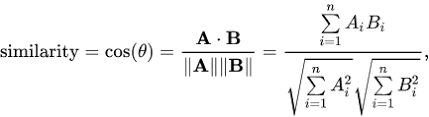

In [176]:
from sklearn.metrics.pairwise import cosine_similarity

# tính toán  cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [177]:
#Xây dựng map đảo ngược các chỉ số và tiêu đề phim
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [178]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Lấy chỉ mục của phim phù hợp với tiêu đề
    idx = indices[title]
    # Nhận điểm tương đồng cặp đôi của tất cả các phim với phim đó
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sắp xếp phim dựa trên điểm giống nhau
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Nhận điểm của 10 bộ phim giống nhau nhất
    sim_scores = sim_scores[1:11]
    # Lấy chỉ số phim
    movie_indices = [i[0] for i in sim_scores]
    recommendations = pd.DataFrame({"Movies": df2['title'].iloc[movie_indices],
                                    "Similarity": [sim[1] for sim in sim_scores]})
    # trả về top 10 phim giống nhau nhất và độ similarity
    return recommendations


In [179]:
get_recommendations('The Dark Knight Rises')

,Movies,Similarity
65,The Dark Knight,0.301122
299,Batman Forever,0.297608
428,Batman Returns,0.286500
1362,Batman,0.263789
1363,Batman,0.263789
3861,"Batman: The Dark Knight Returns, Part 2",0.185759
2513,Slow Burn,0.167173
119,Batman Begins,0.166433
9,Batman v Superman: Dawn of Justice,0.132417
1184,JFK,0.132400


<h5>Credits, Genres and Keywords Based Recommender</h5>

In [180]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + ' '.join(x['crew']) + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

In [181]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])


In [182]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [183]:
# Đặt lại chỉ mục của Khung dữ liệu chính và xây dựng ánh xạ ngược như trên
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

In [184]:
get_recommendations('The Godfather', cosine_sim2)

,Movies,Similarity
867,The Godfather: Part III,0.342997
2736,The Godfather: Part II,0.342997
2655,The Son of No One,0.297044
1021,The Cotton Club,0.292509
1212,The Rainmaker,0.280056
3297,10th & Wolf,0.280056
4640,Amidst the Devil's Wings,0.280056
877,Black Mass,0.257248
1400,Donnie Brasco,0.242536
3972,Point Blank,0.230089


In [185]:
get_recommendations("The Dark Knight Rises",cosine_sim2)

,Movies,Similarity
65,The Dark Knight,0.555937
119,Batman Begins,0.447214
4640,Amidst the Devil's Wings,0.327327
3336,Harry Brown,0.298807
3825,Defendor,0.298807
4105,Harsh Times,0.298807
3363,In Too Deep,0.285714
210,Batman & Robin,0.283473
1509,Takers,0.267261
1992,Faster,0.267261


<h3>APRIORI ALGORITHIOM BASED RECOMMENDATION</h3>

In [171]:
df3.head()

,userId,movie_id,rating,timestamp,budget,popularity,id,production_companies,release_date,revenue,title,vote_average,vote_count,overview,genres,keywords,cast,crew,tags
0,1,70,3.0,964982400,30000000,70.456012,70,"[LakeshoreEntertainment, MalpasoProductions]",2004-12-15,216763646,Million Dollar Baby,7.7,2439,"[Despondent, over, a, painful, estrangement, f...",[Drama],"[transporter, suicideattempt, strongwoman, box...","[ClintEastwood, HilarySwank]",[ClintEastwood],"[Despondent, over, a, painful, estrangement, f..."
1,18,70,3.5,1455735732,30000000,70.456012,70,"[LakeshoreEntertainment, MalpasoProductions]",2004-12-15,216763646,Million Dollar Baby,7.7,2439,"[Despondent, over, a, painful, estrangement, f...",[Drama],"[transporter, suicideattempt, strongwoman, box...","[ClintEastwood, HilarySwank]",[ClintEastwood],"[Despondent, over, a, painful, estrangement, f..."
2,19,70,2.0,965704974,30000000,70.456012,70,"[LakeshoreEntertainment, MalpasoProductions]",2004-12-15,216763646,Million Dollar Baby,7.7,2439,"[Despondent, over, a, painful, estrangement, f...",[Drama],"[transporter, suicideattempt, strongwoman, box...","[ClintEastwood, HilarySwank]",[ClintEastwood],"[Despondent, over, a, painful, estrangement, f..."
3,34,70,3.5,1162048002,30000000,70.456012,70,"[LakeshoreEntertainment, MalpasoProductions]",2004-12-15,216763646,Million Dollar Baby,7.7,2439,"[Despondent, over, a, painful, estrangement, f...",[Drama],"[transporter, suicideattempt, strongwoman, box...","[ClintEastwood, HilarySwank]",[ClintEastwood],"[Despondent, over, a, painful, estrangement, f..."
4,45,70,4.0,951170563,30000000,70.456012,70,"[LakeshoreEntertainment, MalpasoProductions]",2004-12-15,216763646,Million Dollar Baby,7.7,2439,"[Despondent, over, a, painful, estrangement, f...",[Drama],"[transporter, suicideattempt, strongwoman, box...","[ClintEastwood, HilarySwank]",[ClintEastwood],"[Despondent, over, a, painful, estrangement, f..."


In [58]:
df_final=df3[["userId", "movie_id", "title", "rating"]]
df_final.head()

,userId,movie_id,title,rating
0,1,70,Million Dollar Baby,3.0
1,18,70,Million Dollar Baby,3.5
2,19,70,Million Dollar Baby,2.0
3,34,70,Million Dollar Baby,3.5
4,45,70,Million Dollar Baby,4.0


In [202]:
df_final ['rating'] = np.ceil(df_final['rating'])
df_final.rating.unique()

C:\Users\doank\AppData\Local\Temp\ipykernel_17924\932107293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final ['rating'] = np.ceil(df_final['rating'])


array([3., 4., 2., 5., 1.])

In [203]:
movieId_dict = df_final.drop_duplicates('title')[['movie_id', 'title']].set_index('movie_id').to_dict()['title']
list(movieId_dict.items())[:5]

[(70, 'Million Dollar Baby'),
 (157, 'Star Trek III: The Search for Spock'),
 (163, "Ocean's Twelve"),
 (223, 'Rebecca'),
 (231, 'Syriana')]

In [204]:
movieId_dict.get(70)

'Million Dollar Baby'

In [205]:
df_final.isnull().sum()

userId      0
movie_id    0
title       0
rating      0
dtype: int64

In [207]:
df_final.nunique()

userId      598
movie_id    824
title       824
rating        5
dtype: int64

In [209]:
df_final2=df_final.drop_duplicates(subset=['userId'])
df_final2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 16247
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   userId    598 non-null    int64  
 1   movie_id  598 non-null    int64  
 2   title     598 non-null    object 
 3   rating    598 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 23.4+ KB


In [210]:
dataRecommendation = df_final.pivot_table(index='userId', columns='movie_id', values='rating').fillna(0)
dataRecommendation.columns = dataRecommendation.columns.map(movieId_dict)
dataRecommendation.head(10)

movie_id,Four Rooms,Star Wars,Finding Nemo,Forrest Gump,American Beauty,Dancer in the Dark,The Fifth Element,Metropolis,My Life Without Me,Pirates of the Caribbean: The Curse of the Black Pearl,...,Contraband,The Smurfs 2,Chasing Mavericks,This Is 40,Escape Plan,Stitches,Foodfight!,About Time,The Mortal Instruments: City of Bones,The Lost Medallion: The Adventures of Billy Stone
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5.0,4.0,0.0,3.0,0.0,4.0,0.0,2.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [211]:
def encode_units(k):
    if k <= 0:
        return 0
    if k >= 1:
        return 1
sets = dataRecommendation.applymap(encode_units)
sets.head(10)

movie_id,Four Rooms,Star Wars,Finding Nemo,Forrest Gump,American Beauty,Dancer in the Dark,The Fifth Element,Metropolis,My Life Without Me,Pirates of the Caribbean: The Curse of the Black Pearl,...,Contraband,The Smurfs 2,Chasing Mavericks,This Is 40,Escape Plan,Stitches,Foodfight!,About Time,The Mortal Instruments: City of Bones,The Lost Medallion: The Adventures of Billy Stone
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [213]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import random

In [214]:
frequent_itemsets = apriori(sets, min_support=0.15, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.75).sort_values('lift', ascending=False)
rules = rules[['antecedents', 'consequents', 'support', 'lift', 'confidence']]
rules.head()

D:\Download\ANACONDA\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,support,lift,confidence
226,"(Batman Returns, Silent Hill)",(To Kill a Mockingbird),0.168896,3.257362,0.795276
227,(To Kill a Mockingbird),"(Batman Returns, Silent Hill)",0.168896,3.257362,0.691781
110,"(The Conversation, Rain Man)",(Lost in Translation),0.163880,3.145341,0.720588
111,(Lost in Translation),"(The Conversation, Rain Man)",0.163880,3.145341,0.715328
215,(Reservoir Dogs),"(Batman Returns, Monsoon Wedding)",0.157191,3.049696,0.652778


In [215]:
i = random.randint(0, rules.shape[0])
print('Antecedents:', rules.iloc[i].antecedents)
print('Consequents:', rules.iloc[i].consequents)
print(f'Lift: {rules.iloc[i].lift.round(3)} & Confidence: {rules.iloc[i].confidence.round(3)} & Support: {rules.iloc[i].support.round(3)}')

Antecedents: frozenset({'A Nightmare on Elm Street'})
Consequents: frozenset({'Silent Hill', 'Monsoon Wedding'})
Lift: 2.529 & Confidence: 0.55 & Support: 0.157


<h3>COLLABRETIVE FILTRING (CF)</h3>

In [158]:
from sklearn.neighbors import NearestNeighbors

In [222]:
knn = NearestNeighbors(n_neighbors=11, metric='cosine', algorithm='brute', n_jobs=-1)
knn.fit(dataRecommendation.values.T)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=11)

In [223]:
from fuzzywuzzy import process

In [227]:
def recommender(movie_name, num_of_recommendations):
    movie_name= process.extractOne(movie_name, df_final['title'])[0]
    print('selected movie is: ',movie_name)
    a = dataRecommendation.columns.to_frame().reset_index(drop=True).to_dict()['movie_id']
    recommendation_result = list(knn.kneighbors([dataRecommendation[movie_name].values], num_of_recommendations + 1))
    recommendation_result = pd.DataFrame(np.vstack((recommendation_result[1], recommendation_result[0])),
                                         index=['id', 'Cosine_Similarity (degree)']).T
    recommendation_result = recommendation_result.drop([0]).reset_index(drop=True)
    recommendation_result.id = recommendation_result.id.map(a)
    return recommendation_result

In [228]:
recommender('Forrest Gump', 10)

selected movie is:  Forrest Gump


,id,Cosine_Similarity (degree)
0,The Lost Boys,0.555556
1,Licence to Kill,0.572207
2,Riding Giants,0.595774
3,Some Like It Hot,0.660550
4,King Kong,0.666667
5,Volver,0.666667
6,Irreversible,0.666667
7,High Fidelity,0.666667
8,One Flew Over the Cuckoo's Nest,0.666667
9,Bruce Almighty,0.666667


In [229]:
recommender('batman return', 5)


selected movie is:  Batman Returns


,id,Cosine_Similarity (degree)
0,Silent Hill,0.282414
1,To Kill a Mockingbird,0.289445
2,Reservoir Dogs,0.342712
3,Monsoon Wedding,0.386374
4,Wag the Dog,0.438198
